In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [47]:
df = pd.read_csv('imdb_raw.csv')
display(df.head(5))

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M


In [48]:
df['release_year'] = df['release_year'].str.extract('(\d{4})').astype(int)

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Kurniasari Salasa\AppData\Local\Temp\ipykernel_3840\2342033072.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['release_year'] = df['release_year'].str.extract('(\d{4})').astype(int)


,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,1972,175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,2008,152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,1993,195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,1957,96 min,"Crime, Drama",9.0,97,$4.36M


In [49]:
df['runtime'] = df['runtime'].str.extract('(\d+)').astype(int)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Kurniasari Salasa\AppData\Local\Temp\ipykernel_3840\988181470.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['runtime'] = df['runtime'].str.extract('(\d+)').astype(int)


,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,$4.36M


In [50]:
df['gross'] = (
    df['gross']
    .str.replace('[\$,M]', '', regex=True)
    .replace('', np.nan)
)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce') * 1_000_000

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Kurniasari Salasa\AppData\Local\Temp\ipykernel_3840\878903948.py:3: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,M]', '', regex=True)


,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28340000.0
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,134970000.0
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,534860000.0
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,96900000.0
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,4360000.0


In [51]:
# Pastikan rating dan metascore numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')


In [55]:
cols_main = ['rating', 'metascore', 'gross']
df[cols_main] = df[cols_main].replace(0, np.nan)
missing_info = df[cols_main].isna().sum()
print("Missing value setelah cleaning:\n", missing_info)

Missing value setelah cleaning:
 rating         0
metascore    156
gross        191
dtype: int64


In [58]:
df.dropna(inplace=True)
print(df.isnull().sum())

title           0
director        0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross           0
dtype: int64


In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled[:5]

array([[ 4.83262135,  0.4999435 , -0.2696034 ],
       [ 4.46962118,  1.08631106,  0.70759175],
       [ 3.74362082,  0.56509545,  4.37232558],
       [ 3.74362082,  0.92343119,  0.35870476],
       [ 3.74362082,  0.98858314, -0.48936463]])

In [60]:
df_cleaned = pd.DataFrame(df_scaled, columns=['rating', 'metascore', 'gross'])

df_cleaned.head()

,rating,metascore,gross
0,4.832621,0.499944,-0.269603
1,4.469621,1.086311,0.707592
2,3.743621,0.565095,4.372326
3,3.743621,0.923431,0.358705
4,3.743621,0.988583,-0.489365


In [61]:
df.to_csv("data_final_clustering.csv", index=False)

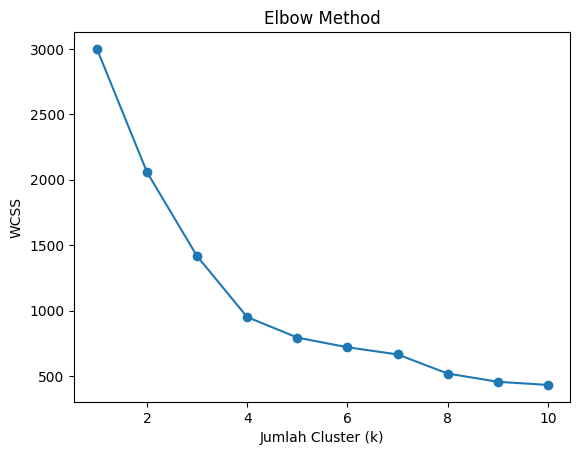

In [62]:
wcss = []  # Within Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.show()


In [63]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(df_cleaned)

df_cleaned['cluster'] = clusters
df_cleaned.head()
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[-0.31427796  0.4029258  -0.23090545]
 [ 0.32498625 -2.15870971 -0.50925128]
 [ 1.07061952  0.41469598  1.55405618]]


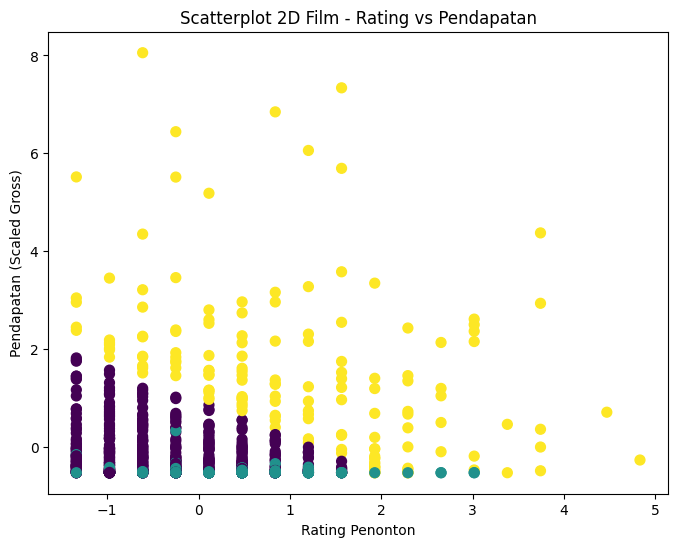

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['rating'], df_cleaned['gross'], c=df_cleaned['cluster'], s=50)
plt.xlabel('Rating Penonton')
plt.ylabel('Pendapatan (Scaled Gross)')
plt.title('Scatterplot 2D Film - Rating vs Pendapatan')
plt.show()

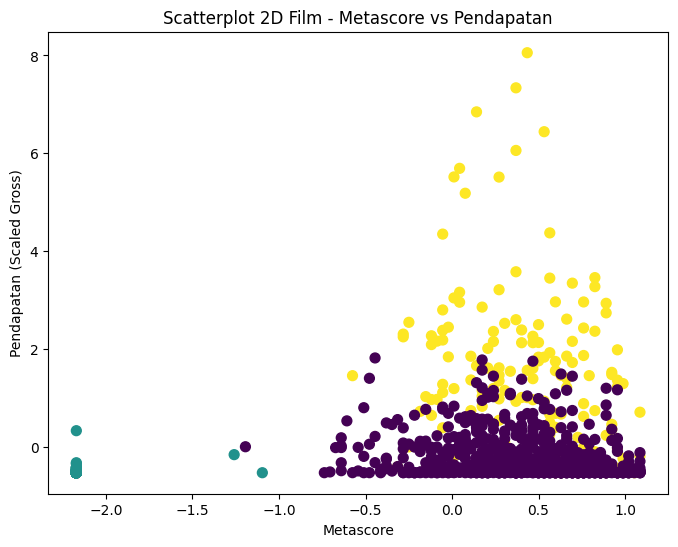

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['metascore'], df_cleaned['gross'], c=df_cleaned['cluster'], s=50)
plt.xlabel('Metascore')
plt.ylabel('Pendapatan (Scaled Gross)')
plt.title('Scatterplot 2D Film - Metascore vs Pendapatan')
plt.show()


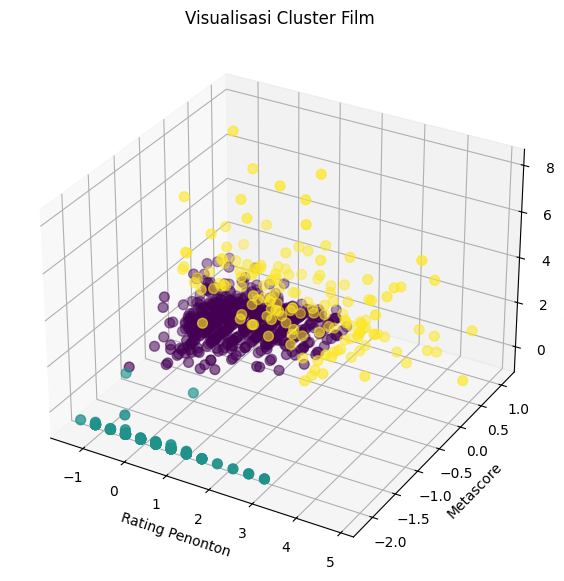

In [67]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cleaned['rating'], df_cleaned['metascore'], df_cleaned['gross'], 
           c=df_cleaned['cluster'], s=50)

ax.set_title('Visualisasi Cluster Film')
ax.set_xlabel('Rating Penonton')
ax.set_ylabel('Metascore')
ax.set_zlabel('Gross (Pendapatan)')
plt.show()
